<a href="https://colab.research.google.com/github/asheta66/Data-Mining-2/blob/main/Linear%20Regression%20Boston%20Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression- Boston Housing**
---

### **Description**
In this lab, you will practice implementing linear regression models




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

<a name="p1"></a>

---
## **Part 1: Boston Housing Dataset**
---

#### **About the Dataset**
For a long time, House Price Index (HPI), which measures price changes of residential housing, has been used to predict the price of a specific house. However, HPI is focused on measuring the average price changes in repeat sales or refinancing on the same properties over time, meaning that many features, such as the house's district, age, or number or floors, are not considered. As a result of HPI's deficiencies, in recent years, Machine Learning techniques have been used to predict individual housing prices.


The Boston Housing Dataset is a collection of data that contains information on various features of houses in the Boston area, such as the number of rooms, the age of the house, and the distance to employment centers. The dataset contains 13 numerical features and a numerical target. It is often used for regression analysis and is a popular benchmark dataset for machine learning algorithms.

The features are as follows:

* `crim`: Per capita crime rate by town
* `zn`: Proportion of residential land zoned for lots over 25,000 sq. ft
* `indus`: Proportion of non-retail business acres per town
* `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* `nox`: Nitric oxide concentration (parts per 10 million)
* `RM`: Average number of rooms per dwelling
* `age`: Proportion of owner-occupied units built prior to 1940
* `dis`: Weighted distances to five Boston employment centers
* `rad`: Index of accessibility to radial highways
* `tax`: Full-value property tax rate per 10,000 dollars
* `ptratio`: Pupil-teacher ratio by town
* `b`: 1000(Bk — 0.63)², where Bk is the proportion [of people of African American descent] by town
* `LSTAT`: Percentage of lower status of the population
* **`TARGET`** (target that needs to be added): Median value of owner-occupied homes in $1000s. *You need to add this column after loading the Boston data from sklearn datasets*.

<br>

**NOTE:** The Boston housing prices dataset has a noted ethical problem: the authors of this dataset engineered a non-invertible variable “B” assuming that racial self-segregation had a positive impact on house prices. This variable is likely due to the practice of ['Redlining'](https://www.wgbh.org/news/local-news/2019/11/12/how-a-long-ago-map-created-racial-boundaries-that-still-define-boston) from the 1930s to 1970s in Boston, which has had long lasting affects in Boston still present today. The goal of the research that led to the creation of this dataset was to study the impact of air quality, but it did not give adequate demonstration of the validity of this assumption. Please know this data set is used for *practice only* and can serve as a good example of why ethical standards are so important for ML models and implementation. [Read more](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8) on problems existing within this data set and why it is not used for anything other than practicing ML.

<br>

#### **Your Task**
Using the Boston Housing dataset, we will do the following:
* Build a model that will predict the median value of owner-occupied homes for Boston in the 1970s;
* Use the model to predict the median value of houses with various room numbers and LSTAT scores.


### **Step #1: Load the data**


In [ ]:
# url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
# df = pd.read_csv(url)
df = pd.read_csv('BostonHousing.csv')

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df = df.rename(columns={'medv': 'TARGET', 'rm': 'RM', 'lstat':'LSTAT'})
df.head()

,crim,zn,indus,chas,nox,RM,age,dis,rad,tax,ptratio,b,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### **Step #2: Decide independent and dependent variables**


We are going to use "Rooms per dwelling" (`RM`) and "Percentage of lower status of the population" (`LSTAT`) as our independent variables for predicting `TARGET`. Our target is the median value of owner-occupied homes. **With these values, we are building a housing value predictor for Boston in the 1970s.** This step has already been done for you.

In [ ]:
df[["LSTAT", "RM", "TARGET"]]

,LSTAT,RM,TARGET
0,4.98,6.575,24.0
1,9.14,6.421,21.6
2,4.03,7.185,34.7
3,2.94,6.998,33.4
4,5.33,7.147,36.2
...,...,...,...
501,9.67,6.593,22.4
502,9.08,6.120,20.6
503,5.64,6.976,23.9
504,6.48,6.794,22.0



**Before we continue, we will create two graphs. One with `LSTAT` and the target, and another with `RM` and the target to explore the relationship between the variables further.**

Text(0, 0.5, 'target')

<Figure size 1000x500 with 0 Axes>

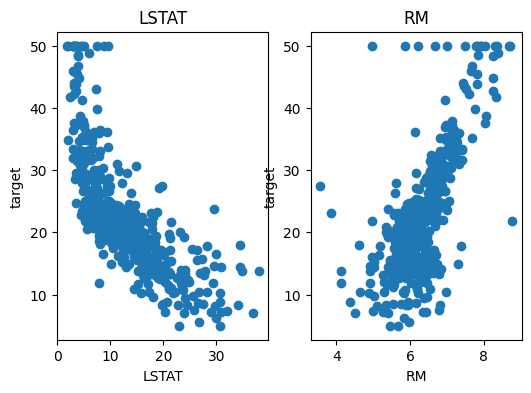

In [ ]:
plt.figure(figsize=(10, 5))

features = df[['LSTAT', 'RM']]
target = df['TARGET']

# Set the figure size
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
x = df["LSTAT"]
y = target
plt.scatter(x, y, marker='o')
plt.title("LSTAT")
plt.xlabel("LSTAT")
plt.ylabel('target')

plt.subplot(1, 2, 2)
x = df["RM"]
y = target
plt.scatter(x, y, marker='o')
plt.title("RM")
plt.xlabel("RM")
plt.ylabel('target')

### **Step #3: Split data into training and testing data**

Specifically ensure the test set is 20% of the overall data. This will be the assumption moving forward.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=20)

### **Step #4: Import your algorithm**


In [ ]:
# import that LinearRegression algorithm
from sklearn.linear_model import LinearRegression

### **Step #5: Initialize your model and set hyperparameters**


Linear regression takes no hyperparameters, so we only need to initialize the model.

In [ ]:
# COMPLETE THIS CODE
# Train the Linear Regression model on the training data and predict the outputs on the test data
model = LinearRegression()

### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### **Create a visualization**

Use `y_test` and your `prediction` (x and y on graph) from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be:
```
plt.plot([0, 50], [0, 50], '--k', label="Correct prediction")
```

This step has already been done for you.

<ipython-input-13-1c7c332c7742>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


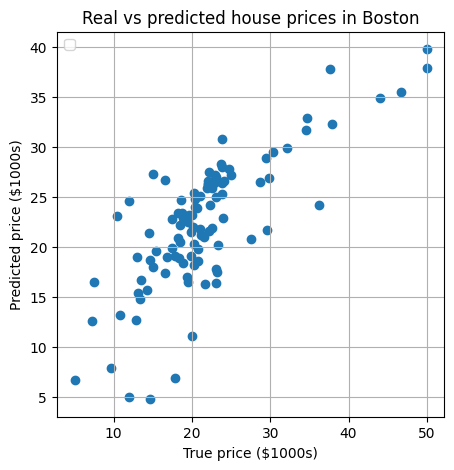

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
# plt.plot([0, 50], [0, 50], '--k', label="Correct prediction")
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title("Real vs predicted house prices in Boston")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Assuming you have already trained the model using model.fit(X_train, y_train)
# If not, make sure to execute the fitting step before running this code

# Get the intercept (b0) and coefficients (bi) from the trained model
intercept = model.intercept_
coefficients = model.coef_

# Get the names of the features used in the model (X_train columns)
feature_names = X_train.columns

# Generate the model equation as a string
model_equation = "y = {:.2f}".format(intercept)

for i, coef in enumerate(coefficients):
    model_equation += " + {:.2f} * {}".format(coef, feature_names[i])

print("Model Equation:")
print(model_equation)


Model Equation:
y = -0.24 + -0.66 * LSTAT + 4.98 * RM


### **Step #7: Evaluate your model**


Use mean squared error and the R2 score as the evaluation metrics.

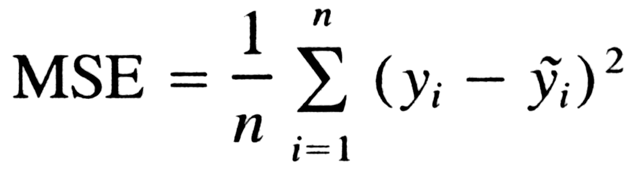

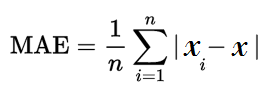

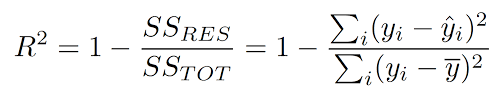

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Square Error :', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

r2 = r2_score(y_test, y_pred)
print('R2                            :', r2)


Mean Square Error : 26.782877492626106
Mean Absolute Error:  4.095232143564047
R2                            : 0.5841519194311251


In [ ]:
from sklearn.linear_model import LinearRegression

# Get the intercept (b0) and coefficients (bi) from the trained model
intercept = model.intercept_
coefficients = model.coef_

# Get the names of the features used in the model (X_train columns)
feature_names = X_train.columns

# Generate the model equation as a string
model_equation = "y = {:.2f}".format(intercept)

for i, coef in enumerate(coefficients):
    model_equation += " + {:.2f} * {}".format(coef, feature_names[i])

print("Model Equation:")
print(model_equation)


Model Equation:
y = -0.24 + -0.66 * LSTAT + 4.98 * RM


### **Step #8: Use the model**

Using the model we created, predict the price of three houses in Boston:

* House 1:  7 rooms and LSTAT is 5.0%

* House 2:  6 rooms and LSTAT is 4.0%

* House 3: 8 rooms and LSTAT is 15.0%

**Note:** you must create a dataframe containing with the information of the new houses:

```python
new_houses = pd.DataFrame(enter_new_house_data_here, columns = ["RM", "LSTAT"])
```

This `new_houses` variable can then be placed directly into the `model.predict()` function.

In [ ]:
# Create a DataFrame with the information of the new houses
new_houses_data = {
    'LSTAT': [5.0, 4.0, 15.0],
    'RM': [7, 6, 8]
}

new_houses_df = pd.DataFrame(new_houses_data)
new_houses_df

,LSTAT,RM
0,5.0,7
1,4.0,6
2,15.0,8


In [ ]:
# Predict using the model
predicted_prices = model.predict(new_houses_df)

# Add the predicted prices to the DataFrame
new_houses_df['Predicted_PRICE'] = predicted_prices

# Display the DataFrame with predicted prices
new_houses_df

,LSTAT,RM,Predicted_PRICE
0,5.0,7,31.321394
1,4.0,6,27.001382
2,15.0,8,29.679773


---
#End of Notebook

© 2023 The Coding School, All rights reserved